# Introduction to Neural Networks - Lab

## Introduction

In this lab, you'll practice everything you have learned during the lecture. We know there is quite a bit of math involved, but don't worry! Using Python and trying things out yourself will actually make a lot of things much more clear! Before we start, let's load some necessary libraries so we can import our data.

## Objectives

You will be able to:
* Import images using Keras
* Build a simple neural network

As usual, we'll start by importing the necessary packages that we'll use in this lab.

In [1]:
!pip install pillow

    100% |████████████████████████████████| 2.1MB 11.7MB/s ta 0:00:01    18% |██████                          | 389kB 29.7MB/s eta 0:00:01
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [64]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In this lab, you'll get a bunch of images, and the purpose is to correctly classify these images as "Santa", meaning that Santa is present on the image or "not Santa" meaning that something else is in the images. 

If you have a look at this github repository, you'll notice that the images are simply stored in .jpeg-files and stored under the folder `/data`. Luckily, `keras` had great modules that make importing images stored in this type of format easy. We'll do this for you in the code below.

The images in the `/data` folder have various resolutions. We will reshape them so they are all have 64 x 64 pixels.

In [66]:
# directory path
train_data_dir = 'data/train'
test_data_dir = 'data/validation'

# get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=132)

# get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=790)

# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 132 images belonging to 2 classes.
Found 790 images belonging to 2 classes.


## Inspecting and preparing the data

## Look at some images

Note that we have 4 numpy arrays now: `train_images`, `train_labels`, `test_images`, `test_labels`. We'll need to make some changes to the data in order to make them workable, but before we do anything else, let's have a look at some of the images we loaded. We'll look at some images in train_images. You can use `array_to_img()` from `keras.processing.image` on any `train_image` (select any train_image by doing `train_image[index]` to look at it.

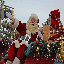

In [67]:
#Your code here preview an image
array_to_img(train_images[5])


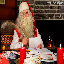

In [68]:
#Your code here preview a second image
array_to_img(train_images[-1])

## The shape of the data

Now, let's use `np.shape()` to look at what these numpy arrays look like.

In [69]:
# Preview the shape of both the images and labels for both the train and test set (4 objects total)
# Your code here
print("Train images {}, Train labels {}, Test images {}, Test labels {}".format(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape))


Train images (790, 64, 64, 3), Train labels (790, 2), Test images (132, 64, 64, 3), Test labels (132, 2)


##  `train_images` and `test_images`

Let's start with `train_images`. From the lecture, you might remember that the expected input shape is $n$ x $l$. How does this relate to what we see here?

$l$ denotes the number of observations, or the number of images. The number of images in `train_images` is 790. $n$ is the number of elements in the feature vector for each image, or put differently, $n$ is the number of rows when unrowing the 3 (RGB) 64 x 64 matrices. 

So, translated to this example, we need to transform our `(790, 64, 64, 3)` matrix to a `(64*64*3, 790)` matrix! Hint: you should use both the `.reshape`-function and a transpose `.T`.

In [70]:
train_img_unrow = train_images.reshape(790, -1).T #Reshape the train images using the hints above

Let's use np.shape on the newly created `train_img_unrow` to verify that the shape is correct.

In [71]:
#Your code here; Preview the shape of your new object
np.shape(train_img_unrow)

(12288, 790)

Next, let's transform test_images in a similar way. Note that the dimensions are different here! Where we needed to have a matrix shape if $ n$ x $l $ for `train_images`, for `test_images`, we need to get to a shape of $ n$ x $m$. What is $m$ here?

In [72]:
m = 132 #Define appropriate m
test_img_unrow = test_images.reshape(m, -1).T

In [73]:
#Your code here; Once again preview the shape of your updated object
np.shape(test_img_unrow)

(12288, 132)

## `train_labels` and `test_labels`

Earlier, you noticed that `train_labels` and `test_labels` have shapes of $(790, 2)$ and $(132, 2)$ respectively. In the lecture, we expected $1$ x $l$ and $1$ x $m$.

Let's have a closer look.

In [74]:
train_labels #Run this block of code; no need to edit

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

Looking at this, it's clear that for each observation (or image), train_labels doesn't simply have an output of 1 or 0, but a pair either `[0,1]` or `[1,0]`.

Having this information, we still don't know which pair corresponds with `santa` versus `not_santa`. Luckily, what this was stored using `keras.preprocessing_image`, and you can get more info using the command `train_generator.class_indices`.

In [75]:
train_generator.class_indices #Run this block of code; no need to edit

{'not_santa': 0, 'santa': 1}

Index 0 (the first column) represents `not_santa`, index 1 represents `santa`. Select one of the two columns and transpose the result such that you get a $1$ x $l$ and $1$ x $m$ vector respectively, and value `1` represents `santa`

In [27]:
train_labels_final = train_labels.T[[1]]#Your code here

In [28]:
np.shape(train_labels_final) #Run this block of code; no need to edit

(1, 790)

In [29]:
test_labels_final = test_labels.T[[1]]#Your code here; same as above but for the test labels.

In [30]:
np.shape(test_labels_final) #Run this block of code; no need to edit

(1, 132)

As a final sanity check, look at an image and the corresponding label, so we're sure that santa is indeed stored as `1`.

- First, use `array_to_image` again on the original `train_images` with index 240 to look at this particular image.
- Use train_labels_final to get the 240th label.

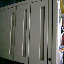

In [31]:
#Your code here; preview train images 240
array_to_img(train_images[240])

In [33]:
#Your code here; preview train labels 240
train_labels_final[:,240]

array([0.], dtype=float32)

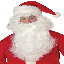

In [34]:
array_to_img(train_images[0])

In [35]:
train_labels_final[:,0]

array([1.], dtype=float32)

This seems to be correct! Feel free to try out other indices as well.

## Lastly, you'll want to standardize the data

Remember that each RGB pixel in an image takes a value between 0 and 255. In Deep Learning, it is very common to standardize and/or center your data set. For images, a common thing that is done is to make sure each pixel value is between 0 and 1. This can be done by dividing the entire matrix by 255. Do this here for the `train_img_unrow` and `test_img_unrow`.

In [36]:
#Your code here
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

In what follows, we'll work with `train_img_final`, `test_img_final`, `train_labels_final`, `test_labels_final`.

## Building a logistic regression-based neural network

## Math recap

Now we can go ahead and build our own basic logistic regression-based neural network to distinguish images with Santa from images without Santa. You've seen in the lecture that logistic regression can actually be represented a very simple neural network.

Remember that we defined that, for each $x^{(i)}$:


$$ \mathcal{L}(\hat y ^{(i)}, y^{(i)}) =  - \big( y^{(i)} \log(\hat y^{(i)}) + (1-y^{(i)} )  \log(1-\hat y^{(i)})\big)$$

$$\hat{y}^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-(z^{(i)})}}$$ 

$$z^{(i)} = w^T x^{(i)} + b$$

The cost function is then given by:
$$J(w,b) = \dfrac{1}{l}\displaystyle\sum^l_{i=1}\mathcal{L}(\hat y^{(i)}, y^{(i)})$$

In the remainder of this lab, you'll do the following:

   - You'll learn how to initialize the parameters of the model
   - You'll perform forward propagation, and calculate the current loss
   - You'll perform backward propagation (which is basically calculating the current gradient)
   - You'll update the parameters (gradient descent)

## Parameter initialization

$w$ and $b$ are the unknown parameters to start with. We'll initialize them as 0.
- remember that $b$ is a scalar
- $w$ however, is a vector of shape $n$ x $1$, with $n$ being `horiz_pixel x vertic_pixel x 3`

## initialize b

 Initialize b as a scalar with value 0.

In [58]:
#Your code here
b = 0

## Initialize w

Create a function `init_w(n)` such that when n is filled out, you get a vector with zeros that has a shape $n$ x $1$.

In [59]:
#Your code here; define your function
def init_w(n):
    w = np.zeros((n,1))
    return w

In [60]:
#Your code here; call your function using appropriate parameters
w = init_w(64*63*3)

## Forward propagation

Forward Propagation:
- You get `x`
- You compute `y_hat`: 
$$ (\hat y^{(1)}, \hat y^{(2)}, \ldots , \hat y^{(l)})= \sigma(w^T x + b) = \Biggr(\dfrac{1}{1+exp(w^T x^{(1)}+ b)},\ldots, \dfrac{1}{1+exp(w^T x^{(l)}+ b)}\Biggr) $$
- You calculate the `cost` function: $J(w,b) = -\dfrac{1}{l}\displaystyle\sum_{i=1}^{l}y^{(i)}\log(\hat y^{(i)})+(1-y^{(i)})\log(1-\hat y^{(i)})$

Here are the two formulas you will be using to compute the gradients. Don't be scared off by the mathematics. The long formulas are just to show that this corresponds with what we derived in the lectures!

$$ \frac{dJ(w,b)}{dw} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{dw}= \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} x^{(i)} dz^{(i)}  = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} x^{(i)}(\hat y^{(i)}-y^{(i)})  = \frac{1}{l}x(\hat y-y)^T$$

$$ \frac{dJ(w,b)}{db} = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} \frac{d\mathcal{L}(\hat y^{(i)}, y^{(i)})}{db}= \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} dz^{(i)}  = \displaystyle\frac{1}{l}\displaystyle\sum^l_{i=1} (\hat y^{(i)}-y^{(i)})$$

In [61]:
#Your code here; define the propagation function

def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T,x)+b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat)+(1-y)* np.log(1-y_hat))    
    dw = (1/l) * np.dot(x,(y_hat-y).T)
    db = (1/l) * np.sum(y_hat-y)
    return dw, db, cost

In [63]:
len(train_labels_final)

1

In [56]:
dw, db, cost = propagation(w, b, train_img_final, train_labels_final) #Your code here; use your propagation function to return d2, db and the associated cost

ValueError: shapes (1,12096) and (12288,790) not aligned: 12096 (dim 1) != 12288 (dim 0)

In [57]:
print(dw)

print(db)

print(cost)

NameError: name 'dw' is not defined

## Optimization

Next, in the optimization step, we have to update $w$ and $b$ as follows:

$$w := w - \alpha * dw$$
$$b := b - \alpha * db$$

Note that this `optimization` function also takes in the propagation function. It loops over the `propagation` function in each iteration, and updates both $w$ and $b$ right after that! 

In [ ]:
#Complete the function below using your propagation function to define dw, db and cost. 
#Then use the formula above to update w and b in the optimization function.
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = #Your code here
        w = #Your code here
        b = #Your code here
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

In [ ]:
#Run this block of code as is
w, b, costs = optimization(w, b, train_img_final, train_labels_final, num_iterations= 151, learning_rate = 0.0001, print_cost = True)

## Make label predictions: Santa or not?

Next, let's create a function that makes label predictions. We'll later use this when we will look at our Santa pictures. What we want, is a label that is equal to 1 when the predicted $y$ is bigger than 0.5, and 0 otherwise.

In [ ]:
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = #Initialize a prediction vector
    w = w.reshape(x.shape[0], 1)
    y_hat = #Your code here; the sigmoid function given w, b and x
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        #Transform the probability into a binary classification using 0.5 as the cutoff
    return y_prediction

Let's try this out on a small example. Make sure to have 4 predictions in your output here!

In [ ]:
#Run this block of code as is
w = np.array([[0.035],[0.123],[0.217]])
b = 0.2
x = np.array([[0.2,0.4,-1.2,-2],[1,-2.,0.1,-1],[0.2,0.4,-1.2,-2]])

prediction(w,b,x)

## The overall model

Now, let's build the overall model!

In [ ]:
#This code is provided to you as is, but should be carefully reviewed.
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {"costs": costs,
         "y_pred_test": y_pred_test, 
         "y_pred_train" : y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return output

In [ ]:
#Run the model!
output = model(train_img_final, train_labels_final, test_img_final, test_img_final, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

## Summary

Well done! In this lab you implemented your first neural network in order to identify images of Santa! In upcoming labs you'll see how to extend your neural networks to include a larger number of layers and how to then successively prune these complex schemas to improve test and train accuracies.